In [23]:
import pandas as pd
import os
import stylia
import matplotlib.pyplot as plt
import seaborn as sns

import stylia as st
from stylia import ONE_COLUMN_WIDTH, TWO_COLUMNS_WIDTH, NamedColorMaps, NamedColors, ContinuousColorMap

data_dir = "../data/"

def load_data(model_id):
    df_0 = pd.read_csv(os.path.join(data_dir, "all_molecules.csv"))
    df_1 = pd.read_csv(os.path.join(data_dir, "all_molecules_{0}.csv".format(model_id)))
    columns = list(df_1.columns)[2:]
    return pd.concat([df_0, df_1[columns]], axis=1)

df = pd.read_csv(os.path.join(data_dir, "all_molecules.csv"))
colors = NamedColors()
npc = colors.get("green")
spc = colors.get("purple")

# Figure 1A

Natural Products vs Synthetic Products bar plot including the targets

Text(0.5, 1.0, '')

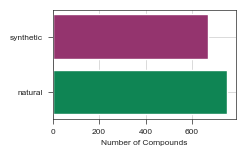

In [2]:
fig, axs = stylia.create_figure(1, 1, width=TWO_COLUMNS_WIDTH/3, height=TWO_COLUMNS_WIDTH/5)
category_counts = df["category"].value_counts()
ax = axs.next()
ax.barh(category_counts.index, category_counts.values, color=[npc, spc])
ax.set_ylabel("")
ax.set_xlabel("Number of Compounds")
ax.set_title("")

## FIGURE 1B

Natural product scores

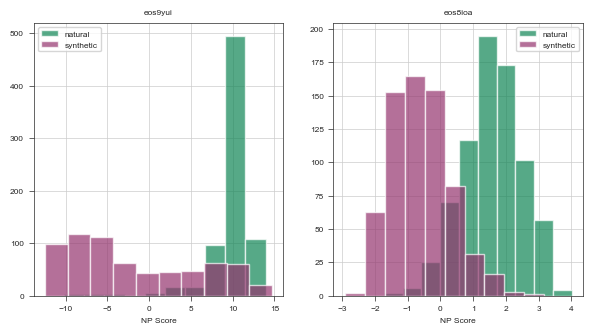

In [3]:
df = load_data("eos9yui") #NP likeness
df_ = load_data("eos8ioa") #NP score
fig, axs = stylia.create_figure(1, 2, width=TWO_COLUMNS_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.hist(df[df["category"]=="natural"]["score"], alpha = 0.7, label = "natural", color = npc)
ax.hist(df[df["category"]=="synthetic"]["score"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos9yui")
ax.set_xlabel("NP Score")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(df_[df_["category"]=="natural"]["nplikeness"], alpha = 0.7, label = "natural", color=npc)
ax.hist(df_[df_["category"]=="synthetic"]["nplikeness"], alpha = 0.7, label = "synthetic", color=spc)
ax.set_title("eos8ioa")
ax.set_xlabel("NP Score")
ax.set_ylabel("")
ax.legend()

In [10]:
smi

'Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(C[C@H](O)[C@H](O)[C@H](O)COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)c2cc1C'

/tmp/ipykernel_881099/853563286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sd.sort_values(by="score", inplace=True, ascending=False)


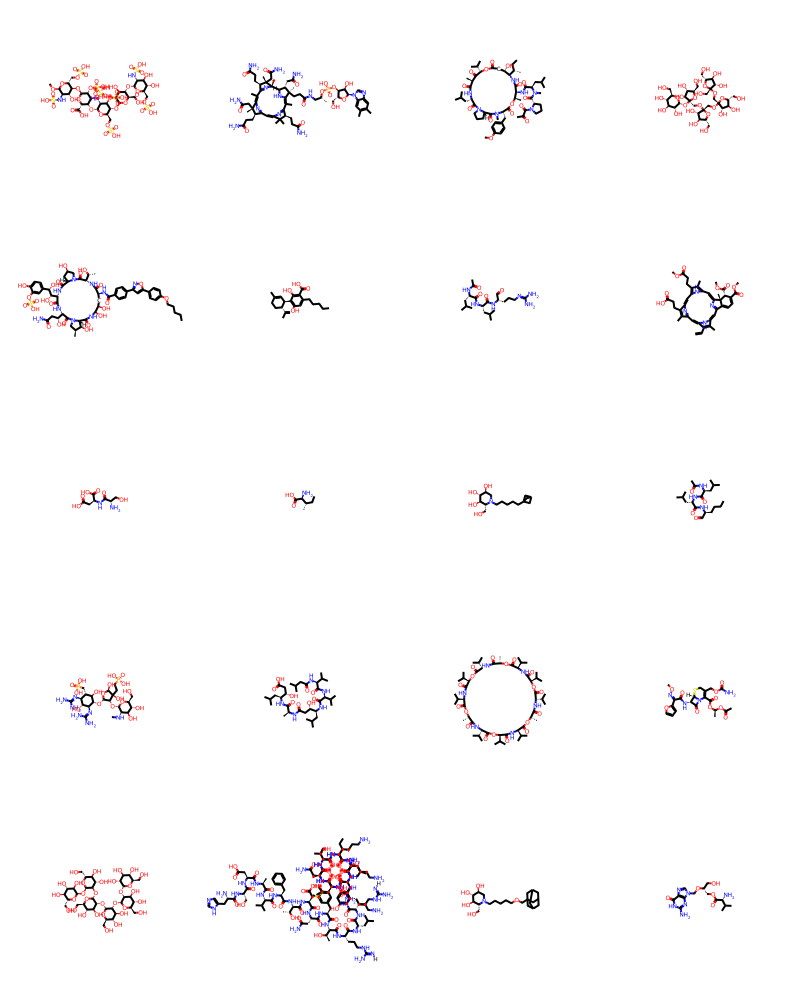

In [12]:
#check the top ranked synthetic products according to each model to ensure they are well classified

df_sd = df[df["category"]=="synthetic"]
df_sd.sort_values(by="score", inplace=True, ascending=False)
top_smi = df_sd["smiles"].tolist()[:20]

from rdkit import Chem
from rdkit.Chem import Draw
mols = [Chem.MolFromSmiles(smiles) for smiles in top_smi]   
mols = [mol for mol in mols if mol is not None]
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200))
img

/tmp/ipykernel_881099/3320066140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sd.sort_values(by="nplikeness", inplace=True, ascending=False)


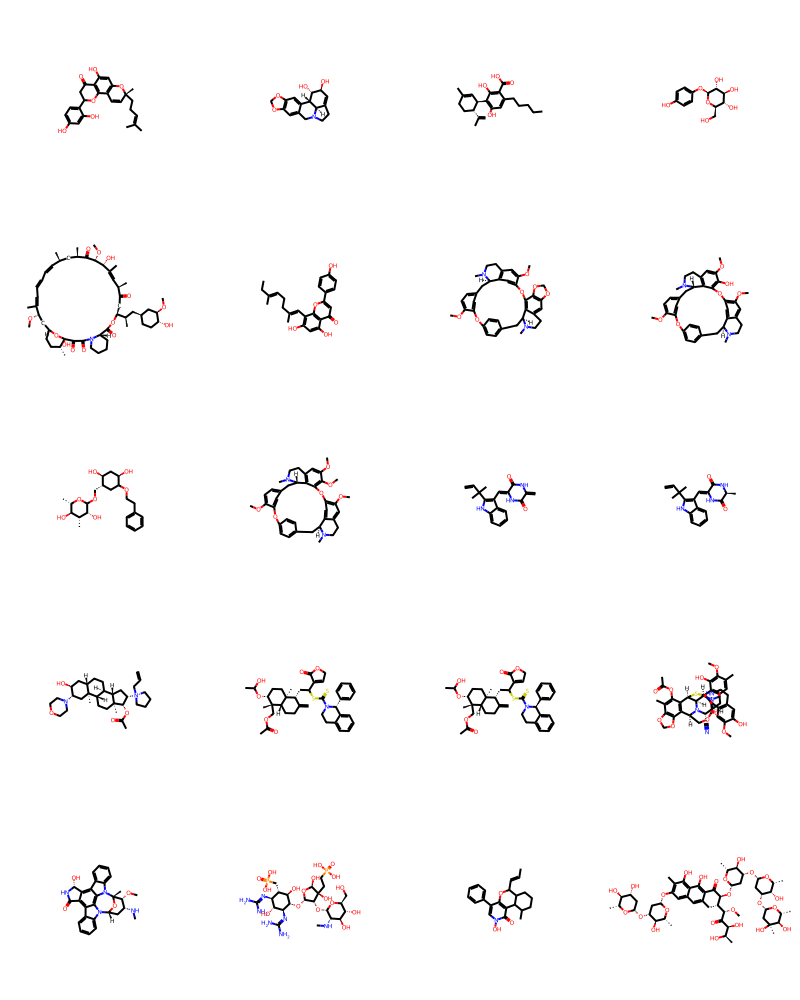

In [19]:
#check the bottom ranked synthetic products according to each model to ensure they are well classified

df_sd = df_[df_["category"]=="synthetic"]
df_sd.sort_values(by="nplikeness", inplace=True, ascending=False)
top_smi = df_sd["smiles"].tolist()[:20]

from rdkit import Chem
from rdkit.Chem import Draw
mols = [Chem.MolFromSmiles(smiles) for smiles in top_smi]   
mols = [mol for mol in mols if mol is not None]
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200))
img

/tmp/ipykernel_881099/2397596664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_np.sort_values(by="score", inplace=True, ascending=True)


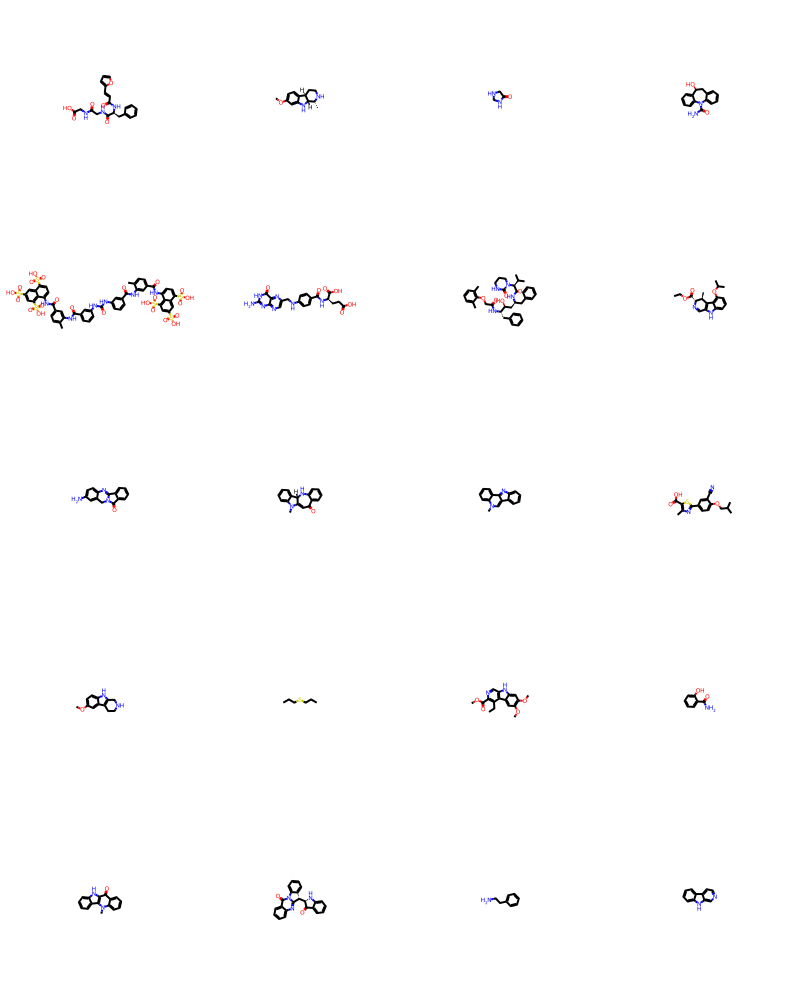

In [14]:
#check the bottom ranked synthetic products according to each model to ensure they are well classified

df_np = df[df["category"]=="natural"]
df_np.sort_values(by="score", inplace=True, ascending=True)
top_smi = df_np["smiles"].tolist()[:20]

from rdkit import Chem
from rdkit.Chem import Draw
mols = [Chem.MolFromSmiles(smiles) for smiles in top_smi]   
mols = [mol for mol in mols if mol is not None]
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200))
img

/tmp/ipykernel_881099/1610944839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_np.sort_values(by="nplikeness", inplace=True, ascending=True)


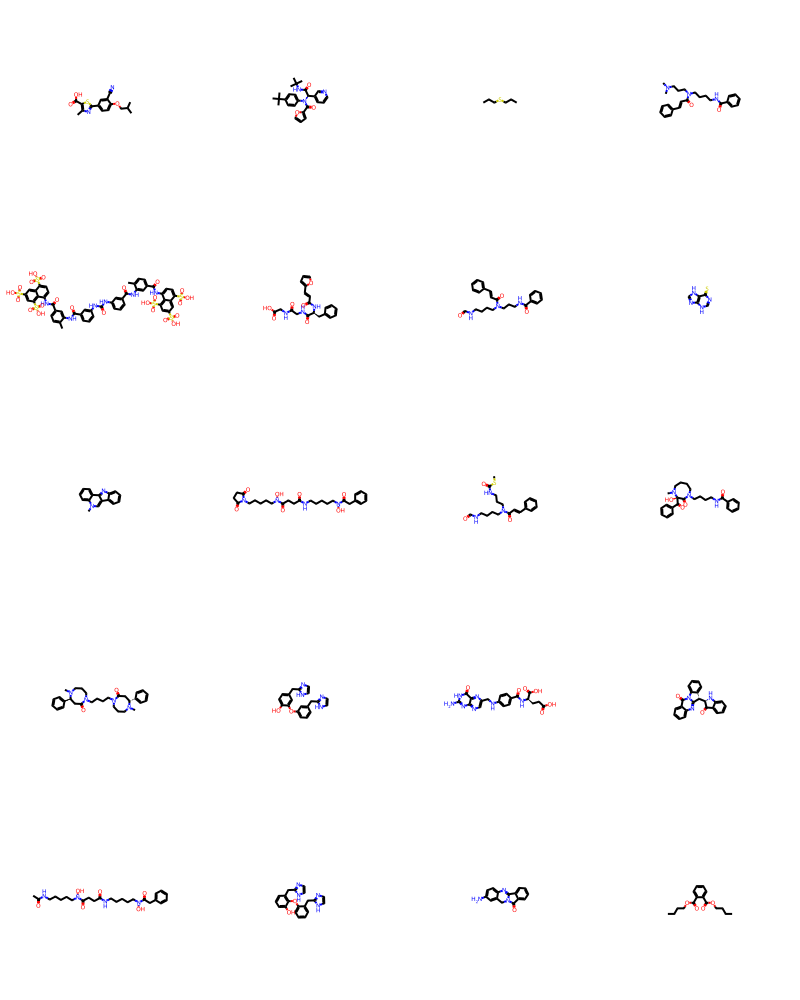

In [17]:
df_np = df_[df_["category"]=="natural"]
df_np.sort_values(by="nplikeness", inplace=True, ascending=True)
top_smi = df_np["smiles"].tolist()[:20]

from rdkit import Chem
from rdkit.Chem import Draw
mols = [Chem.MolFromSmiles(smiles) for smiles in top_smi]   
mols = [mol for mol in mols if mol is not None]
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200))
img

## Figure 1C

Synthetic Accessibility score

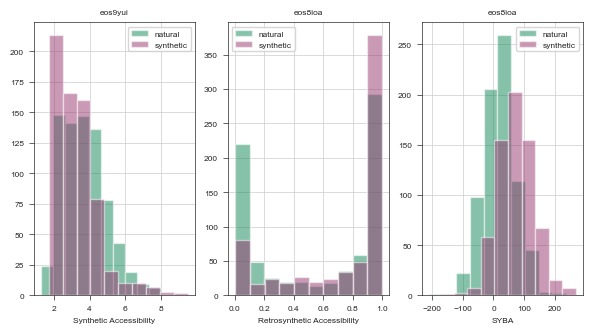

In [4]:
df1 = load_data("eos9ei3") #SA score
df2 = load_data("eos2r5a") #RA Score
df3 = load_data("eos7pw8") #SYBA
fig, axs = stylia.create_figure(1, 3, width=TWO_COLUMNS_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.hist(df1[df1["category"]=="natural"]["sa_score"], alpha = 0.5, label = "natural", color = npc)
ax.hist(df1[df1["category"]=="synthetic"]["sa_score"], alpha = 0.5, label = "synthetic", color = spc)
ax.set_title("eos9yui")
ax.set_xlabel("Synthetic Accessibility")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(df2[df2["category"]=="natural"]["RA_score"], alpha = 0.5, label = "natural", color=npc)
ax.hist(df2[df2["category"]=="synthetic"]["RA_score"], alpha = 0.5, label = "synthetic", color=spc)
ax.set_title("eos8ioa")
ax.set_xlabel("Retrosynthetic Accessibility")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(df3[df3["category"]=="natural"]["sy_sa"], alpha = 0.5, label = "natural", color=npc)
ax.hist(df3[df3["category"]=="synthetic"]["sy_sa"], alpha = 0.5, label = "synthetic", color=spc)
ax.set_title("eos8ioa")
ax.set_xlabel("SYBA")
ax.set_ylabel("")
ax.legend()

# Figure 1D
UMAPS with Whales and Connectivity descriptors

/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


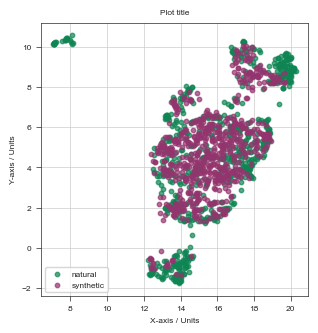

In [5]:
import umap
import numpy as np
df = load_data("eos24ur")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]

umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)

fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.scatter(np.transpose(np_umap)[0], np.transpose(np_umap)[1], alpha = 0.7, label="natural", color = npc)
ax.scatter(np.transpose(syn_umap)[0], np.transpose(syn_umap)[1], alpha = 0.7, label = "synthetic", color = spc)
ax.legend()

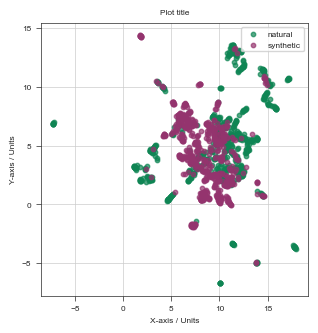

In [6]:
import umap
import numpy as np

df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]

umap_trn = umap.UMAP(n_neighbors=10)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)

fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.scatter(np.transpose(np_umap)[0], np.transpose(np_umap)[1], alpha = 0.7, label="natural", color=npc)
ax.scatter(np.transpose(syn_umap)[0], np.transpose(syn_umap)[1], alpha = 0.7, label = "synthetic", color=spc)
ax.legend()

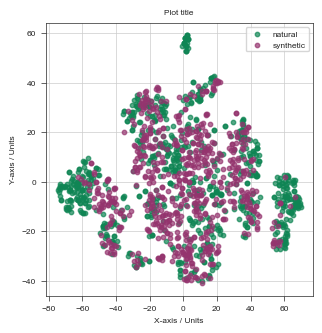

In [7]:
from sklearn.manifold import TSNE

df = load_data("eos24ur")
df = df.dropna()
df = df.reset_index(drop=True)
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]

# Apply t-SNE transformation
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(descs_array)
# Split array based on category
nat_idx = df[df['category'] == 'natural'].index
syn_idx = df[df['category'] == 'synthetic'].index

tsne_nat = tsne_results[nat_idx]
tsne_syn = tsne_results[syn_idx]

fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.scatter(tsne_nat[:,0], tsne_nat[:,1], alpha = 0.7, label="natural", color = npc)
ax.scatter(tsne_syn[:,0], tsne_syn[:,1], alpha = 0.7, label = "synthetic", color=spc)
ax.legend()

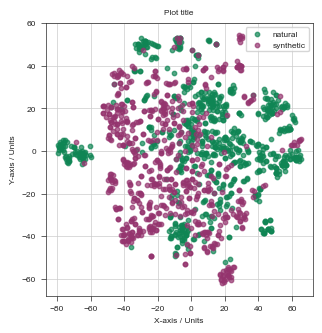

In [8]:
from sklearn.manifold import TSNE

df = load_data("eos2gw4")
df = df.dropna()
df = df.reset_index(drop=True)
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]

# Apply t-SNE transformation
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(descs_array)
# Split array based on category
nat_idx = df[df['category'] == 'natural'].index
syn_idx = df[df['category'] == 'synthetic'].index

tsne_nat = tsne_results[nat_idx]
tsne_syn = tsne_results[syn_idx]

fig, axs = stylia.create_figure(1, 1, width=ONE_COLUMN_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.scatter(tsne_nat[:,0], tsne_nat[:,1], alpha = 0.7, label="natural", color = npc)
ax.scatter(tsne_syn[:,0], tsne_syn[:,1], alpha = 0.7, label = "synthetic", color = spc)
ax.legend()

# Figure 1G

ADME properties

In [27]:
df  = load_data("eos7d58")

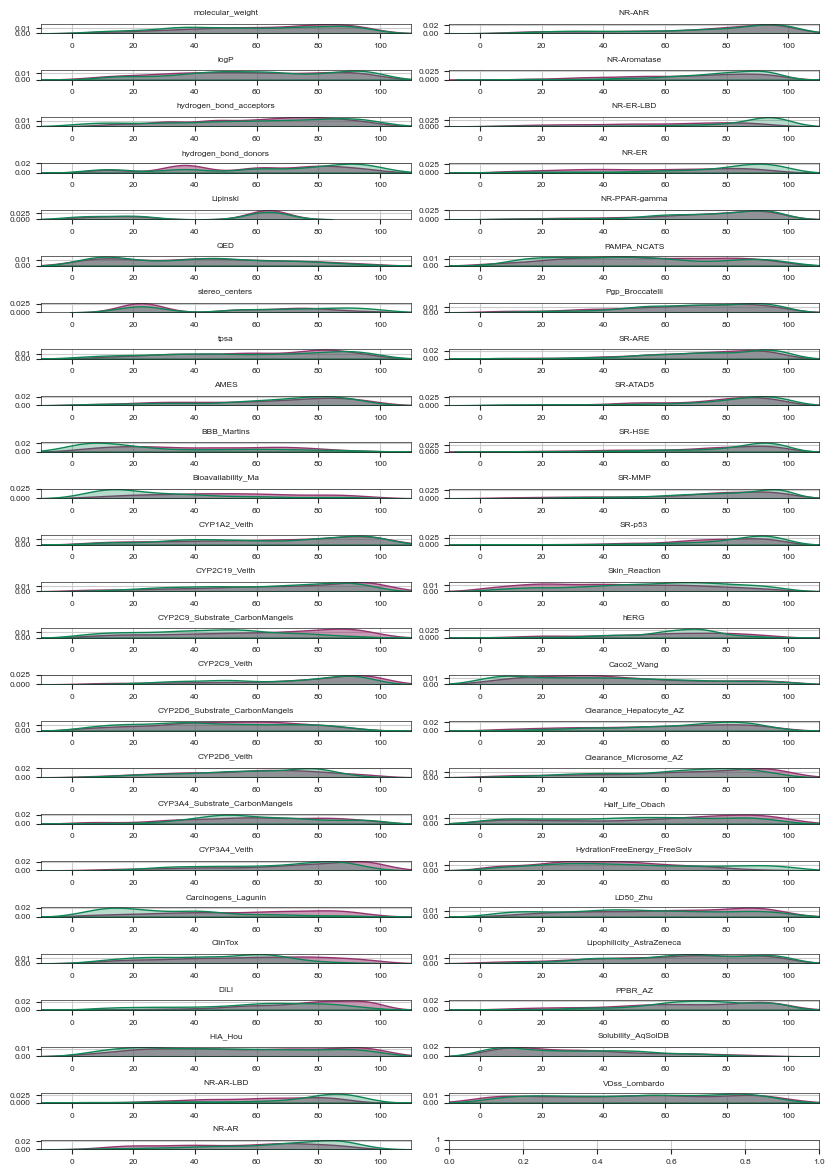

In [29]:
cols_plot = []
for c in df.columns:
    if "drugbank_approved_percentile" in c:
        cols_plot += [c]
len(cols_plot)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(25,2, figsize=(8.3,11.7))  # A4 size in inches: 11.7 x 8.3 for half A4

# Ensure there are as many axes as columns
for i, column in enumerate(cols_plot):
    ax = axs[i % 25, i // 25]  # Determine the position of the subplot
    sns.kdeplot(df[df["category"] == "synthetic"][column], ax=ax, alpha=0.5, color=spc, fill=True)
    sns.kdeplot(df[df["category"] == "natural"][column], ax=ax, alpha=0.3, color=npc, fill=True)
    ax.set_title(column.replace("_drugbank_approved_percentile", ""))
    ax.set_xlabel('')  # Remove individual x-axis labels for cleaner look
    ax.set_ylabel('')  # Remove individual y-axis labels for cleaner look
    ax.set_xlim(-10,110)

plt.tight_layout()  # Adjust subplots to fit in figure area.
plt.show()

In [11]:
all_props = [
    "molecular_weight", "logP", "hydrogen_bond_acceptors", "hydrogen_bond_donors", "Lipinski", "QED",
    "stereo_centers", "tpsa", "AMES", "BBB_Martins", "Bioavailability_Ma", "CYP1A2_Veith",
    "CYP2C19_Veith", "CYP2C9_Substrate_CarbonMangels", "CYP2C9_Veith", "CYP2D6_Substrate_CarbonMangels",
    "CYP2D6_Veith", "CYP3A4_Substrate_CarbonMangels", "CYP3A4_Veith", "Carcinogens_Lagunin", "ClinTox",
    "DILI", "HIA_Hou", "NR-AR-LBD", "NR-AR", "NR-AhR", "NR-Aromatase", "NR-ER-LBD", "NR-ER", "NR-PPAR-gamma",
    "PAMPA_NCATS", "Pgp_Broccatelli", "SR-ARE", "SR-ATAD5", "SR-HSE", "SR-MMP", "SR-p53", "Skin_Reaction",
    "hERG", "Caco2_Wang", "Clearance_Hepatocyte_AZ", "Clearance_Microsome_AZ", "Half_Life_Obach",
    "HydrationFreeEnergy_FreeSolv", "LD50_Zhu", "Lipophilicity_AstraZeneca", "PPBR_AZ", "Solubility_AqSolDB",
    "VDss_Lombardo"
]

In [12]:
%%capture
import seaborn as sns

for p in all_props:
    prop = p + "_drugbank_approved_percentile"
    fig, ax = plt.subplots(1,1)
    sns.kdeplot(df[df["category"]=="natural"][prop], alpha = 0.7, color = npc, fill=True)
    sns.kdeplot(df[df["category"]=="synthetic"][prop], alpha = 0.7, color = spc, fill = True)
    plt.title(p)
    plt.savefig(f"../figures/admet_props/{p}.png", dpi=300)

In [36]:
selected_props = [
    "molecular_weight", "logP", "Solubility_AqSolDB",
    "BBB_Martins", "Bioavailability_Ma", 
    "CYP2C9_Veith", "CYP3A4_Veith",
    "DILI", "Carcinogens_Lagunin", "hERG",
    "NR-AR-LBD", "NR-PPAR-gamma",
    "SR-ARE", "Skin_Reaction",
    "Clearance_Hepatocyte_AZ", "HIA_Hou",
]
print(len(selected_props))

16


In [39]:
cols_plot

['molecular_weight_drugbank_approved_percentile',
 'logP_drugbank_approved_percentile',
 'Solubility_AqSolDB_drugbank_approved_percentile',
 'BBB_Martins_drugbank_approved_percentile',
 'Bioavailability_Ma_drugbank_approved_percentile',
 'CYP2C9_Veith_drugbank_approved_percentile',
 'CYP3A4_Veith_drugbank_approved_percentile',
 'DILI_drugbank_approved_percentile',
 'Carcinogens_Lagunin_drugbank_approved_percentile',
 'hERG_drugbank_approved_percentile',
 'NR-AR-LBD_drugbank_approved_percentile',
 'NR-PPAR-gamma_drugbank_approved_percentile',
 'SR-ARE_drugbank_approved_percentile',
 'Skin_Reaction_drugbank_approved_percentile',
 'Clearance_Hepatocyte_AZ_drugbank_approved_percentile',
 'HIA_Hou_drugbank_approved_percentile']

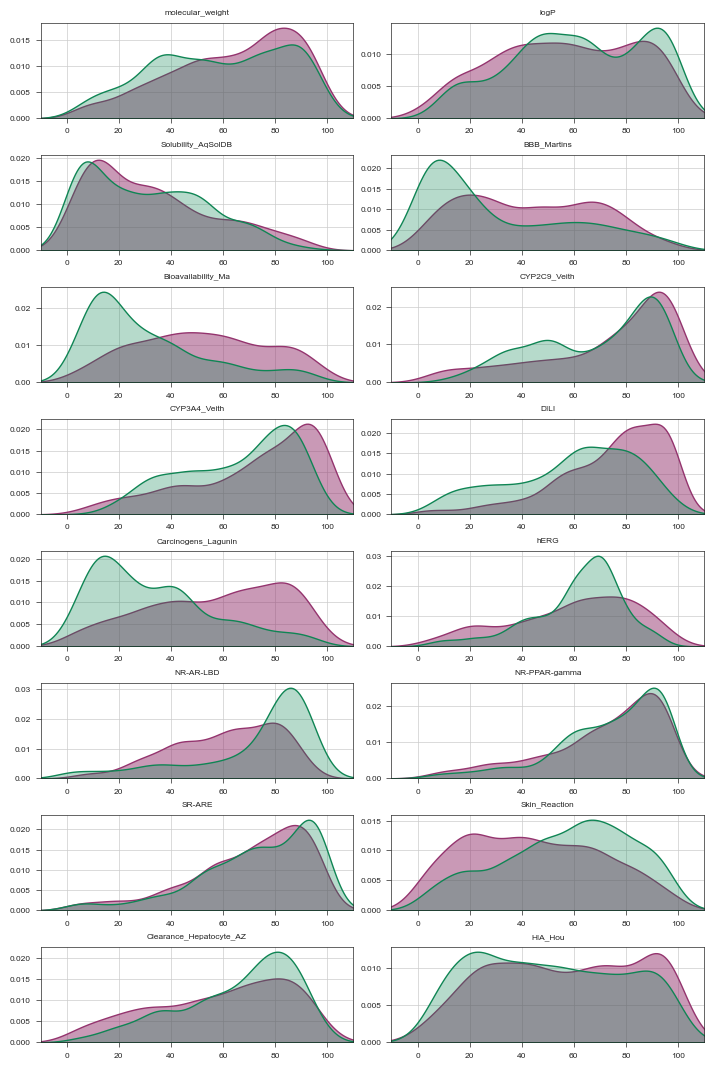

In [42]:
cols_plot = []
for c in selected_props:
    cols_plot += [c + "_drugbank_approved_percentile"]
cols_plot

fig, axs = stylia.create_figure(8, 2, width=TWO_COLUMNS_WIDTH, height=TWO_COLUMNS_WIDTH*1.5)

# Ensure there are as many axes as columns
for i, column in enumerate(cols_plot):
    ax = axs.next()
    sns.kdeplot(df[df["category"] == "synthetic"][column], ax=ax, alpha=0.5, color=spc, fill=True)
    sns.kdeplot(df[df["category"] == "natural"][column], ax=ax, alpha=0.3, color=npc, fill=True)
    ax.set_title(column.replace("_drugbank_approved_percentile", ""))
    ax.set_xlabel('')  # Remove individual x-axis labels for cleaner look
    ax.set_ylabel('')  # Remove individual y-axis labels for cleaner look
    ax.set_xlim(-10,110)

plt.tight_layout()  # Adjust subplots to fit in figure area.
plt.show()

## Suplementary

COVID predicted activity with REDIAL-2000 (eos8fth), ImageMol (eos4cxk) and SarsCov1 Chemprop (eos9f6t)

In [44]:
eos8fth = load_data("eos8fth")
eos8fth.columns

Index(['file_name', 'inchikey', 'smiles', 'category', 'AlphaLISA', 'CoV1-PPE',
       'cytotox', 'CPE', 'ACE2', 'CoV1-PPE_cs', 'TruHit', 'MERS-PPE_cs',
       'hCYTOX', 'MERS-PPE', '3CL'],
      dtype='object')

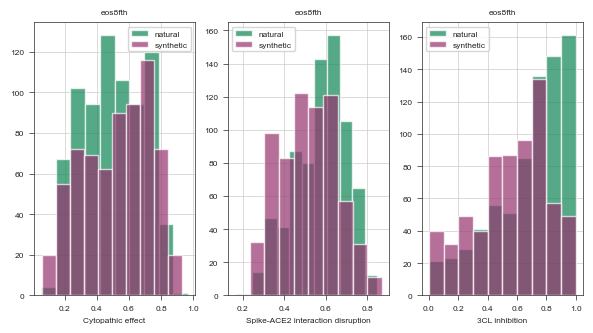

In [45]:
fig, axs = stylia.create_figure(1, 3, width=TWO_COLUMNS_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.hist(eos8fth[eos8fth["category"]=="natural"]["CPE"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos8fth[eos8fth["category"]=="synthetic"]["CPE"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos8fth")
ax.set_xlabel("Cytopathic effect")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(eos8fth[eos8fth["category"]=="natural"]["AlphaLISA"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos8fth[eos8fth["category"]=="synthetic"]["AlphaLISA"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos8fth")
ax.set_xlabel("Spike-ACE2 interaction disruption")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(eos8fth[eos8fth["category"]=="natural"]["3CL"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos8fth[eos8fth["category"]=="synthetic"]["3CL"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos8fth")
ax.set_xlabel("3CL inhibition")
ax.set_ylabel("")
ax.legend()

In [46]:
eos4cxk = load_data("eos4cxk")
eos4cxk.columns

Index(['file_name', 'inchikey', 'smiles', 'category', 'CoV2_Cytotox',
       'TMPRSS2', 'MERS_PPE_cs', 'Human', 'AlphaLISA', '3CL', 'ACE2', 'HEK293',
       'CoV_PPE', 'CoV2_CPE', 'TruHit', 'CoV_PPE_cs', 'MERS_PPE'],
      dtype='object')

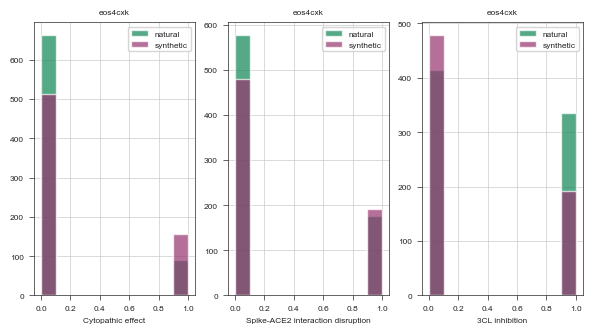

In [47]:
fig, axs = stylia.create_figure(1, 3, width=TWO_COLUMNS_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.hist(eos4cxk[eos4cxk["category"]=="natural"]["CoV2_CPE"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos4cxk[eos4cxk["category"]=="synthetic"]["CoV2_CPE"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos4cxk")
ax.set_xlabel("Cytopathic effect")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(eos4cxk[eos4cxk["category"]=="natural"]["AlphaLISA"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos4cxk[eos4cxk["category"]=="synthetic"]["AlphaLISA"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos4cxk")
ax.set_xlabel("Spike-ACE2 interaction disruption")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(eos4cxk[eos4cxk["category"]=="natural"]["3CL"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos4cxk[eos4cxk["category"]=="synthetic"]["3CL"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos4cxk")
ax.set_xlabel("3CL inhibition")
ax.set_ylabel("")
ax.legend()

In [49]:
eos9f6t = load_data("eos9f6t")
eos9f6t.columns

Index(['file_name', 'inchikey', 'smiles', 'category', 'activity'], dtype='object')

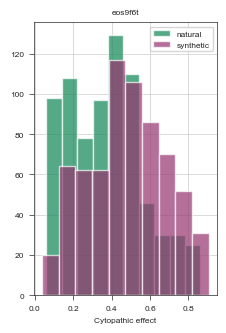

In [50]:
fig, axs = stylia.create_figure(1, 1, width=TWO_COLUMNS_WIDTH/3, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.hist(eos9f6t[eos9f6t["category"]=="natural"]["activity"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos9f6t[eos9f6t["category"]=="synthetic"]["activity"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos9f6t")
ax.set_xlabel("Cytopathic effect")
ax.set_ylabel("")
ax.legend()